# Instalaciones Necesarias

In [ ]:
# !python.exe -m pip install --upgrade pip
# !pip install numpy pandas matplotlib scikit-learn seaborn

# Importaciones principales

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Colección de datos

### Informacion importante

In [229]:
iris = load_iris()

print("Muestras:", iris.data.shape)
print("Nombres especies:", iris.target_names)
print("Características:", iris.feature_names)

Muestras: (150, 4)
Nombres especies: ['setosa' 'versicolor' 'virginica']
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Converison a data frame con pandas

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_df.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Distribucion de las especies

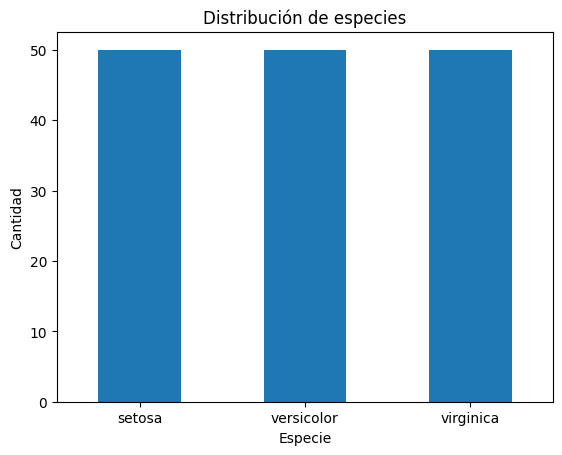

In [231]:
iris_df['species'].value_counts().plot(kind='bar')
plt.title('Distribución de especies')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


### Distribucion de las características

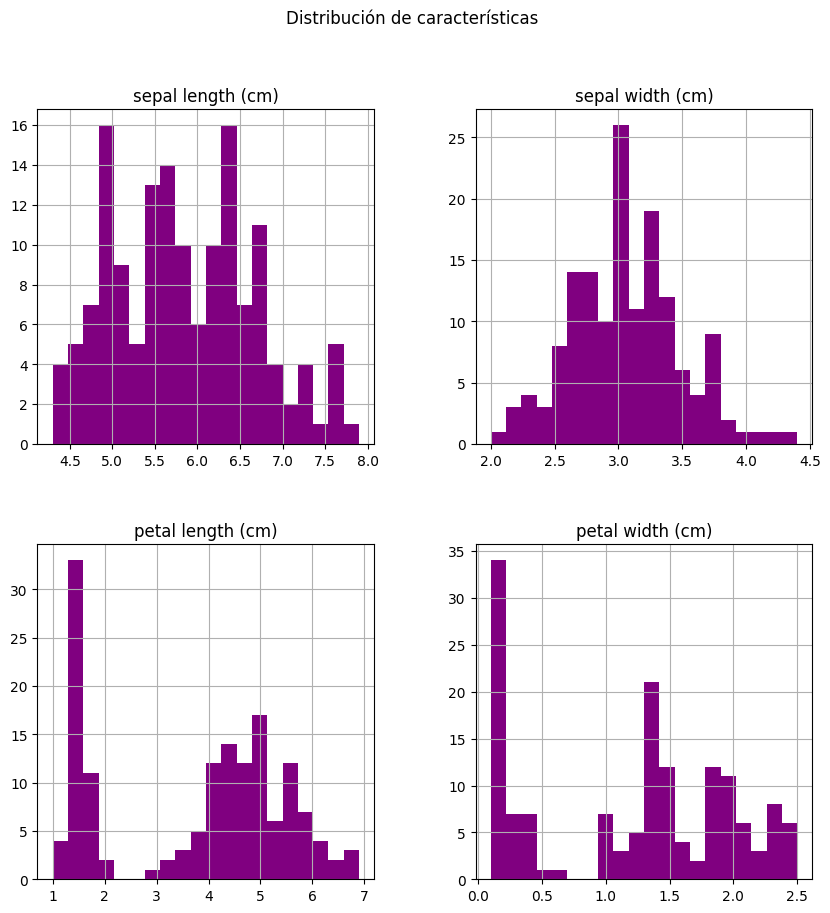

In [254]:
# ver la distribucion de las caracteristicas
iris_df.drop('species', axis=1).hist(bins=20, figsize=(10, 10), color='purple')
plt.suptitle('Distribución de características')
plt.show()

### Distribución de las especies por petalo

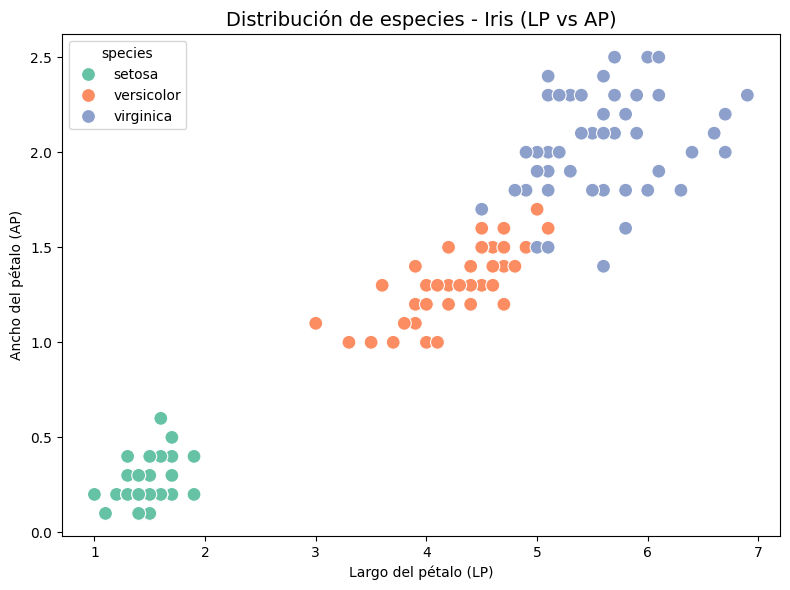

In [233]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set2', s=100)
plt.title("Distribución de especies - Iris (LP vs AP)", fontsize=14)
plt.xlabel("Largo del pétalo (LP)")
plt.ylabel("Ancho del pétalo (AP)")
plt.tight_layout()
plt.show()

### Distribución de las especies por sepalo

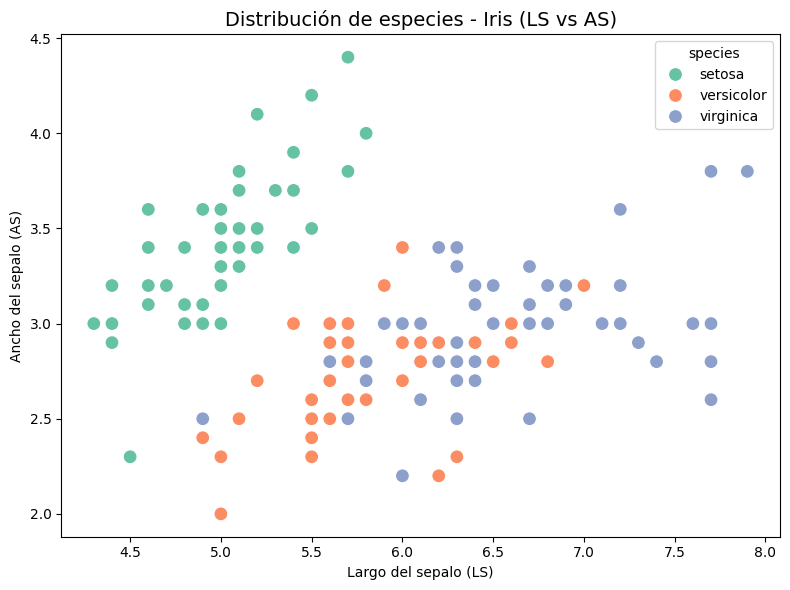

In [234]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set2', s=100)
plt.title("Distribución de especies - Iris (LS vs AS)", fontsize=14)
plt.xlabel("Largo del sepalo (LS)")
plt.ylabel("Ancho del sepalo (AS)")
plt.tight_layout()
plt.show()

# Preparacion pre-entrenamiento

### Division de datos en entrenamiento y prueba

In [235]:
from sklearn.model_selection import train_test_split

# Asignación de características
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# asignacion de etiquetas
y = iris.target

# 20% de los datos para test y 80% para entrenamiento
# random_state para asegurar siempre la misma división de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificación de las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento: (120, 4) (120,)
Dimensiones del conjunto de prueba: (30, 4) (30,)


### Escalamiento de caracteristicas


Esto permite que todas las características tengan la misma importancia inicial, y no dominen las que tienen valores más grandes, con el fin de:
- La media de cada columna sea 0
- La desviacion estandar de cada columna sea 1

In [236]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento de cada modelo

              Modelo  Precisión
                 KNN        1.0
Decision Tree (C4.5)        1.0
         Naive Bayes        1.0
 Logistic Regression        1.0
                 SVM        1.0
       Random Forest        1.0 



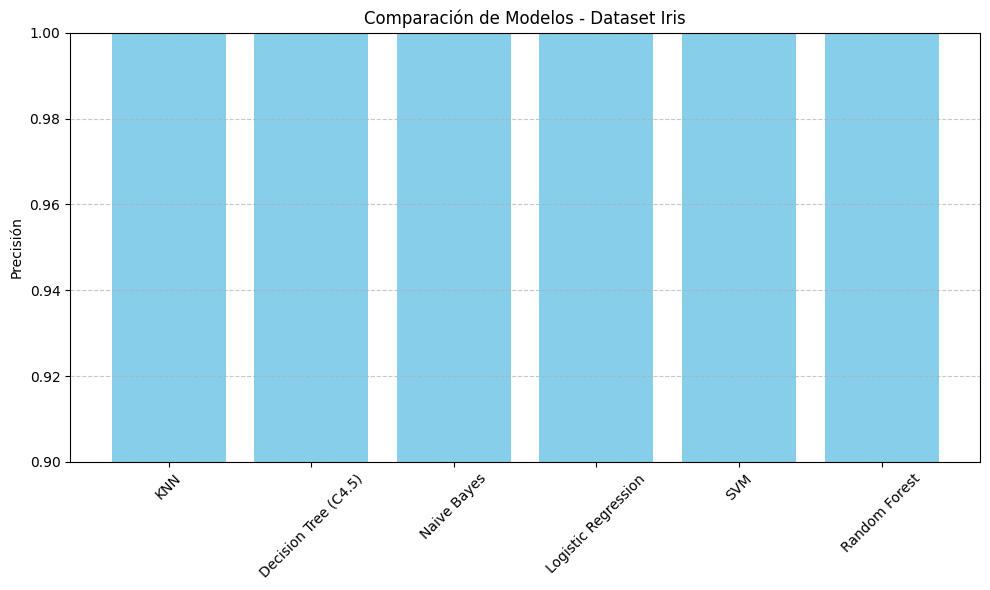

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Lista de modelos
modelos = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree (C4.5)": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

# Entrenamiento de cada modelo
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    score = modelo.score(X_test_scaled, y_test)
    resultados[nombre] = score

# Resultados
resultados_df = pd.DataFrame(resultados.items(), columns=['Modelo', 'Precisión'])
print(resultados_df.to_string(index=False), "\n")

# Resultados en grafica
plt.figure(figsize=(10, 6))
plt.bar(resultados_df['Modelo'], resultados_df['Precisión'], color='skyblue')
plt.ylabel("Precisión")
plt.title("Comparación de Modelos - Dataset Iris")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# Etrenamiento con Validacion Cruzada

In [242]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay
)

# Métricas personalizadas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Validacion cruzada y metrica promedio
metricas = {}
for nombre, modelo in modelos.items():
    scores = cross_validate(modelo, X, y, cv=5, scoring=scoring)
    metricas[nombre] = {m: np.mean(scores[f'test_{m}']) for m in scoring}


# Graficos y comparación

### Comparacion de metricas de cada modelo con cross_validate

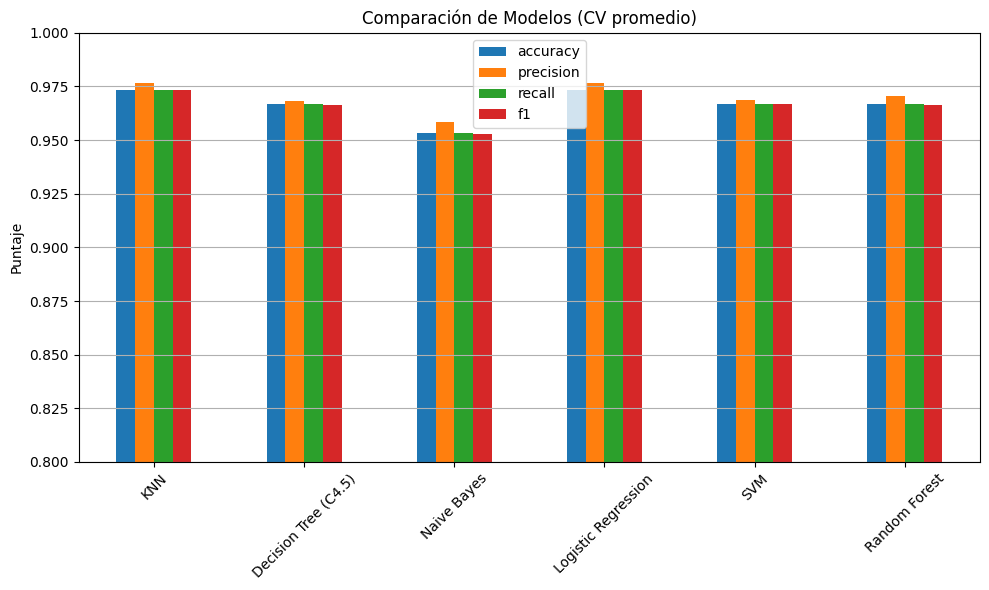

In [243]:
df_metricas = pd.DataFrame(metricas).T
df_metricas.plot(kind='bar', figsize=(10,6))
plt.title("Comparación de Modelos (CV promedio)")
plt.ylabel("Puntaje")
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Matriz de confusión para cada modelo con cross_validate

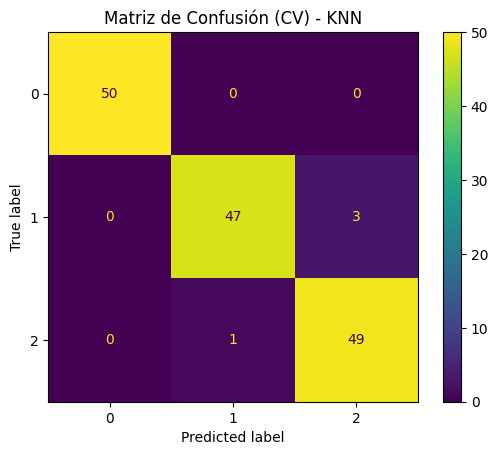

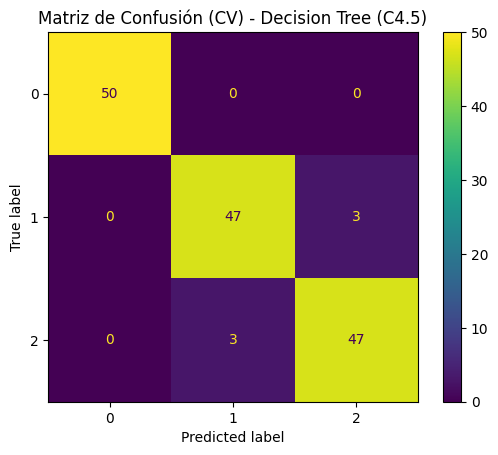

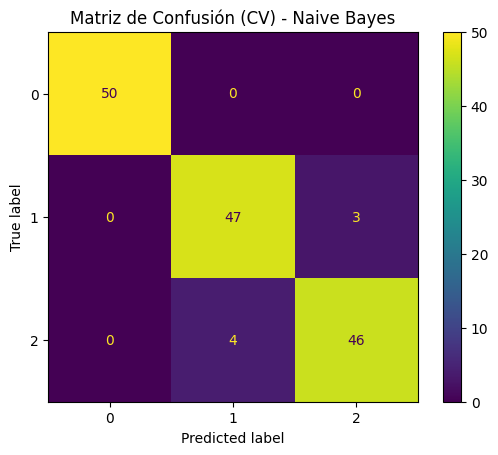

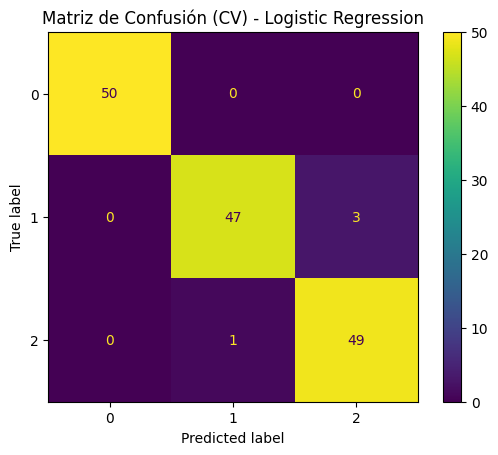

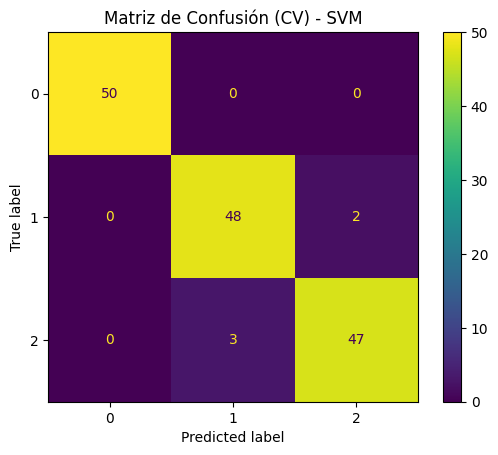

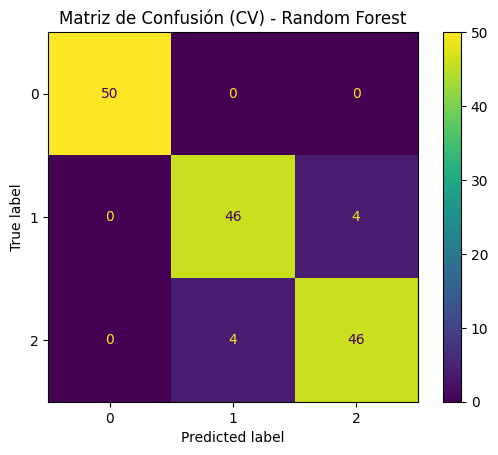

In [244]:
for nombre, modelo in modelos.items():
    y_pred_cv = cross_val_predict(modelo, X, y, cv=5)
    ConfusionMatrixDisplay.from_predictions(y, y_pred_cv)
    plt.title(f"Matriz de Confusión (CV) - {nombre}")
    plt.show()

# Eleccion de modelo

### Modelo Regresion Logistica con mejores resultados y mejor adaptacion


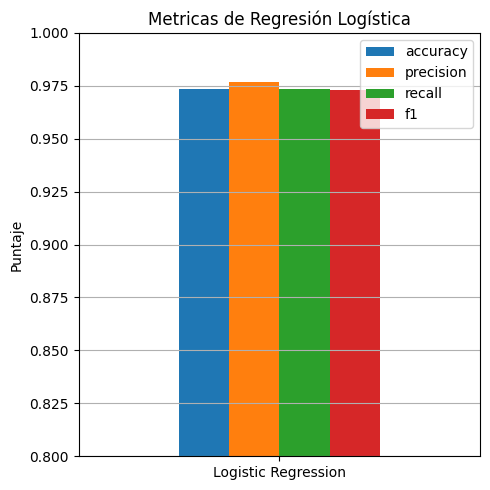

In [256]:
df_metricas.loc[['Logistic Regression']].plot(kind='bar', figsize=(5,5))
plt.title("Metricas de Regresión Logística")
plt.ylabel("Puntaje")
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()